In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings



In [92]:
warnings.filterwarnings("ignore")

- carregando os dados e visualizando

In [4]:
df = pd.read_csv('nobel.csv')
df.head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


- tenho por hábito ver as colunas, para identificar possíveis erros nas strings e para facilitar a seleção de nos usos das variáveis

In [5]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

- variável 'top_gender' nos apresenta a proporção entre quantos homens e quantas mulheres ganharam o premio nobel

In [6]:
top_gender = df['sex'].value_counts()
top_gender

sex
Male      905
Female     65
Name: count, dtype: int64

-  'top_country' nos mostra os 5 principais países mais premiádos

In [153]:
top_country = df['birth_country'].value_counts()
top_country.head()

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Name: count, dtype: int64

-----

- daqui usarei de albuns métodos pandas para selecionar intervalos especificos para determinar e visualizar a distribuição das premiações com base em alguns fatores

In [8]:
df['year'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [9]:
classes = [1901, 1910, 1920,1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020] #14
labels = ['1','1910','1920','1930','1940','1950','1960','1970','1980','1990','2010','2020']

In [38]:
prop_usa_winners = pd.value_counts(
    pd.cut(
        x=df[df['birth_country'] == 'United States of America']['year'],  # Filtrando apenas os nascidos nos EUA
        bins=classes,
        labels=labels,
        include_lowest=True,
        ordered=False
    )
)

In [39]:
prop_usa_winners = pd.DataFrame(prop_usa_winners).reset_index()

In [42]:
prop_usa_winners = prop_usa_winners.rename(columns={'year': 'decade', 'count':'usa_born_winner'})

In [46]:
to_float = prop_usa_winners['usa_born_winner'].astype(float)

In [49]:
prop_usa_winners['usa_born_winner'] = to_float

In [51]:
prop_usa_winners.head(2)

,decade,usa_born_winner
0,2010,50.0
1,2020,42.0


- temos as premiações referênte apenas as pessoas nascidas nos estados unidos, aplicando uma simples média móvel que identifica um padrão nas últimas décadas do aumento de premiações para pessoas dessa origem.

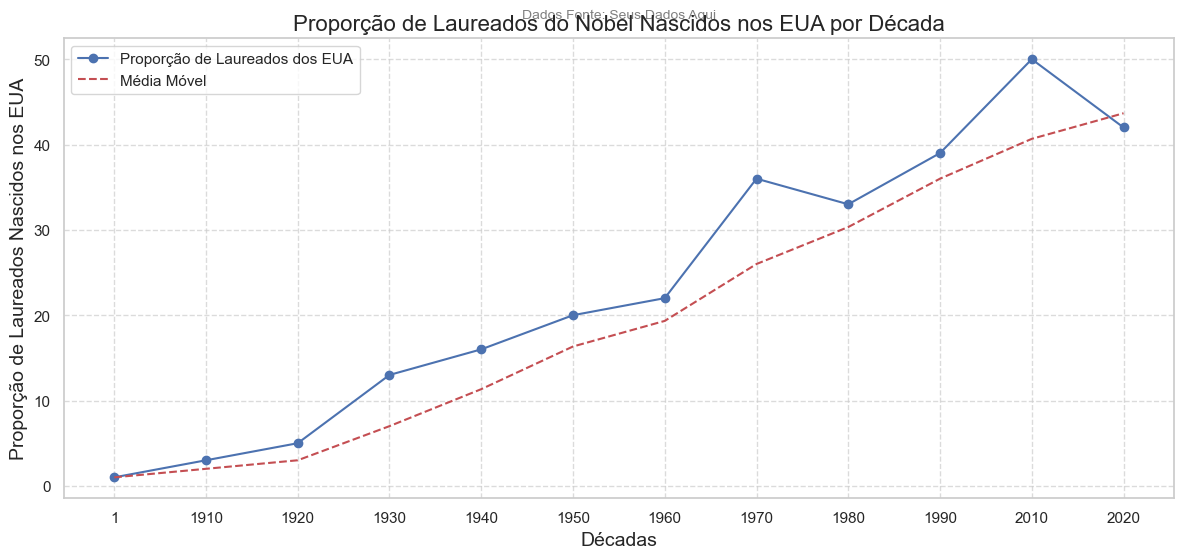

In [155]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(prop_usa_winners_sorted['decade'], prop_usa_winners_sorted['usa_born_winner'], marker='o', color='b', label='Proporção de Laureados dos EUA')

plt.plot(prop_usa_winners_sorted['decade'], prop_usa_winners_sorted['usa_born_winner'].rolling(window=3, min_periods=1).mean(), color='r', linestyle='--', label='Média Móvel')


plt.grid(True, linestyle='--', alpha=0.7)


plt.title('Proporção de Laureados do Nobel Nascidos nos EUA por Década', fontsize=16)
plt.xlabel('Décadas', fontsize=14)
plt.ylabel('Proporção de Laureados Nascidos nos EUA', fontsize=14)

plt.legend()

plt.text(0.5, 1.05, 'Dados Fonte: Seus Dados Aqui',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=10, color='gray')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


----

- nossa segunda seleção dirá respeito a distribuição das premiações pelas decádas somente para as mulheres, subcategorizando também pela categoria da premiação

In [62]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [75]:
female_winners = pd.value_counts(
    pd.cut(
        x=df[df['sex'] == 'Female']['year'],  # Filtrando apenas os nascidos nos EUA
        bins=classes,
        labels=labels,
        include_lowest=True,
        ordered=False
    )
).reset_index()

In [76]:
female_winners['category'] = df['category']

In [77]:
female_winners

,year,count,category
0,2020,17,Chemistry
1,2010,11,Literature
2,1990,7,Medicine
3,1970,4,Peace
4,1980,4,Peace
5,1,3,Physics
6,1930,3,Chemistry
7,1940,3,Literature
8,1960,3,Medicine
9,1920,2,Peace


In [79]:
female_winners = female_winners.rename(columns={'year': 'decade','count': 'female_winner'})
female_winners

,decade,female_winner,category
0,2020,17,Chemistry
1,2010,11,Literature
2,1990,7,Medicine
3,1970,4,Peace
4,1980,4,Peace
5,1,3,Physics
6,1930,3,Chemistry
7,1940,3,Literature
8,1960,3,Medicine
9,1920,2,Peace


In [80]:
prop_female_winners = female_winners[['decade', 'category','female_winner' ]]
prop_female_winners

,decade,category,female_winner
0,2020,Chemistry,17
1,2010,Literature,11
2,1990,Medicine,7
3,1970,Peace,4
4,1980,Peace,4
5,1,Physics,3
6,1930,Chemistry,3
7,1940,Literature,3
8,1960,Medicine,3
9,1920,Peace,2


<Figure size 1200x600 with 0 Axes>

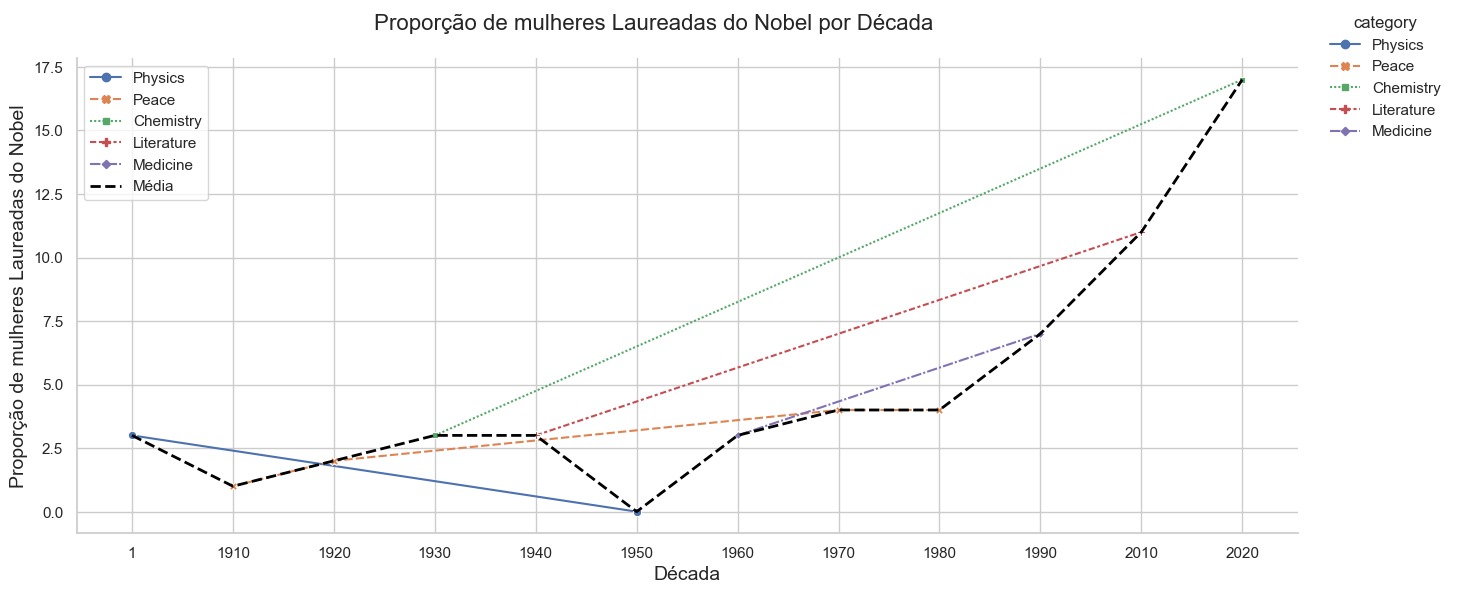

In [157]:
female_winners_sorted = prop_female_winners.sort_values('decade')

mean_values = female_winners_sorted.groupby('decade')['female_winner'].mean().reset_index()
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6), dpi=100)

ax2 = sns.relplot(
    data=female_winners_sorted,
    x='decade',
    y='female_winner',
    hue='category',
    kind='line',
    markers=True,
    style='category',
    height=6,
    aspect=2,
)


sns.lineplot(x='decade', y='female_winner', data=mean_values, label='Média', color='black', linestyle='--', linewidth=2)

plt.suptitle('Proporção de mulheres Laureadas do Nobel por Década', fontsize=16)
plt.xlabel('Década', fontsize=14)
plt.ylabel('Proporção de mulheres Laureadas do Nobel', fontsize=14)

sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust as needed
plt.show()


- podemos perceber pela variação da média que entre a decada de 40 e 60 há uma ocilação no numero de premiações, e que as mulheres mais premiadas são após esse periodo e com as principais categorias senndo química, literatura, e medicina. 

---

- uma lista das primeiras premiadas em cada categoria, sendo marie curie a primeira da história em 1911, em quimica e física,  

In [144]:
fits_woman = df[df['sex'] == 'Female']

first_women = fits_woman.groupby('category').agg({'year': 'min', 'full_name': 'first'}).reset_index()

for index, row in first_women.iterrows():
    print(f'A primeira mulher a ganhar um Prêmio Nobel na categoria {row["category"]} foi {row["full_name"]} em {row["year"]}.')


A primeira mulher a ganhar um Prêmio Nobel na categoria Chemistry foi Marie Curie, née Sklodowska em 1911.
A primeira mulher a ganhar um Prêmio Nobel na categoria Economics foi Elinor Ostrom em 2009.
A primeira mulher a ganhar um Prêmio Nobel na categoria Literature foi Selma Ottilia Lovisa Lagerlöf em 1909.
A primeira mulher a ganhar um Prêmio Nobel na categoria Medicine foi Gerty Theresa Cori, née Radnitz em 1947.
A primeira mulher a ganhar um Prêmio Nobel na categoria Peace foi Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau em 1905.
A primeira mulher a ganhar um Prêmio Nobel na categoria Physics foi Marie Curie, née Sklodowska em 1903.


---

- lista das organizações mais premiadas, e o números de premiações 

In [159]:
organization = df['organization_name'].value_counts()
Repeat_list = pd.DataFrame(organization)
Repeat_list.head()

,count
organization_name,
University of California,36
Harvard University,28
Massachusetts Institute of Technology (MIT),22
Stanford University,22
University of Chicago,19


- lista das pessoas que receberam mais de uma premiação, 

In [162]:
organization = df['full_name'].value_counts()
Repeat_list = pd.DataFrame(organization)
Repeat_list.head()

,count
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Linus Carl Pauling,2
John Bardeen,2
Frederick Sanger,2
"Marie Curie, née Sklodowska",2
